## THE NETWORK OF VOLTAIRE'S PHILOSOPHICAL DICTIONARY 
## Notebook 2: Plotting the directed graph of references among dictionary items
## By M.A. Boudourides, H. Bin Fahad, Y. Malla, & S. Silwal

In [1]:
# Change the following two lines:
# import os
# os.chdir("/Users/[User Name]/Desktop/")
import codecs,re, math, random, pickle, collections, operator, string,urllib2 
import itertools as it
import pandas as pd
import numpy as np
import networkx as nx
from networkx import NetworkXNoPath
from networkx.algorithms import bipartite
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
def g_diagnostics(G,st):
    
    print "The %s graph has %i nodes and %i edges" %(st,len(G.nodes()), len(G.edges()))
#     print

    if G.is_multigraph()==True:
        print "The %s graph is a multigraph" %st
    else:
        print "The %s graph is a simple graph" %st
    if nx.is_weighted(G)==True:
        print "The %s graph is a weighted graph" %st
    else:
        print "The %s graph is an unweighted graph" %st
    if G.is_directed()==True:
        print "The %s graph is a directed graph" %st
    else:
        print "The %s graph is an undirected graph" %st    
    if nx.is_bipartite(G)==True:
        print "The %s graph is a bipartite graph" %st
    else:
        print "The %s graph is not a bipartite graph" %st    
    if nx.is_tree(G)==True:
        print "The %s graph is a tree" %st
    else:
        print "The %s graph is not a tree" %st    
    if G.is_directed()==False:
        if nx.is_connected(G)==True:
            print "The %s graph is a connected graph" %st
        else:
            print "The %s graph is a disconnected graph and it has %i connected components" %(st,nx.number_connected_components(G))   
    else:
        if nx.is_strongly_connected(G)==True:
            print "The %s graph is a strongly connected graph" %st
        else:
            print "The %s graph is not strongly connected and it has %i strongly connected components" %(st,nx.number_strongly_connected_components(G))
        if nx.is_weakly_connected(G)==True:
            print "The %s graph is a weakly connected graph" %st
        else:
            print "The %s graph is not weakly connected and it has %i weakly connected components" %(st,nx.number_weakly_connected_components(G))    
    if len(list(nx.isolates(G)))>0:
        print "The %s graph has isolates" %(st,len(list(nx.isolates(G))))
    else:
        print "The %s graph has no isolates" %st
    print "The density of the %s graph is %.3f" %(st,nx.density(G))   
    print "The transitivity of the %s graph is %.3f" %(st,nx.transitivity(G)) 
    print "The reciprocity of the %s graph is %.3f" %(st,nx.reciprocity(G))

def g_diameter(G,st):    
    try:
        diameter=nx.diameter(G)
        print "The diameter of the largest strongly connected component of %s graph is %i" %(st,diameter)
    except Exception as e: 
        print(e)

### Reading the text of Voltaire's Philosophical Dictionary

In [3]:
filename = 'Voltaire_PhilosophicalDictionary_mod1.txt'
titlename = "Voltaire's Philosophical Dictionary"

f = codecs.open(filename, "r", encoding="utf-8").readlines()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)

Voltaire's Philosophical Dictionary has number of words = 88628 (and number of characters/symbols = 515505)


In [4]:
items_d={}
text="\n".join(f).split("##########################################################")
text=[s.replace('\r','') for s in text if len(s)>0]
for t in text:
    tt=t.split('\n')
    tt=[s for s in tt if len(s)>0]
    items_d[tt[0].strip().lower()]=' '.join(tt[1:]).strip().lower()

In [5]:
print len(items_d)
sorted(items_d.keys())

99


[u'adultery',
 u'advocate',
 u'ancient',
 u'animal',
 u'antiquity',
 u'art',
 u'astrology',
 u'atheism',
 u'author',
 u'authority',
 u'banishment',
 u'bankruptcy',
 u'beauty',
 u'bishop',
 u'book',
 u'boulevart',
 u'bourges',
 u'brahmin',
 u'character',
 u'charlatan',
 u'civil law',
 u'climate',
 u'common sense',
 u'contradiction',
 u'corn',
 u'cromwell',
 u'custom',
 u'democracy',
 u'destiny',
 u'devout',
 u'ecclesiast',
 u'emblem',
 u'envy',
 u'equality',
 u'event',
 u'expiation',
 u'extreme',
 u'ezourveidam',
 u'faith',
 u'false mind',
 u'fatherland',
 u'final causes',
 u'fraud',
 u'free-will',
 u'french',
 u'friendship',
 u'general reflection on man',
 u'god',
 u'government',
 u'helvetia',
 u'history',
 u'ignorance',
 u'impious',
 u'iron mask',
 u'joan of arc',
 u'kiss',
 u'language',
 u'law',
 u'liberty',
 u'library',
 u'limits of the human mind',
 u'local crimes',
 u'love',
 u'luxury',
 u'marriage',
 u'master',
 u'men of letters',
 u'metamorphosis',
 u'milton',
 u'modern',
 u'moh

In [6]:
for k,v in items_d.items():
    print items_d.keys().index(k)+1, '|', k, '|', v
    print "&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&"

1 | liberty | either i am very much mistaken, or locke the definer has very well defined liberty as "power." i am mistaken again, or collins, celebrated london magistrate, is the only philosopher who has really sifted this idea, and clark's answer to him was merely that of a theologian. but of all that has been written in france on liberty, the following little dialogue seems to me the most clear. a: there is a battery of guns firing in your ears, have you the liberty to hear them or not to hear them? b: without doubt, i cannot stop myself hearing them. a: do you want this gun to carry off your head and the heads of your wife and daughter, who are walking with you? b: what are you talking about? as long as i am of sound mind, i cannot want such a thing; it is impossible. a: good; you hear this gun necessarily, and you wish necessarily that neither you nor your family shall die from a cannon shot while you are out for a walk; you have not the power either of not hearing or of wishing to

In [7]:
edges=[]
for k,v in items_d.items():
    for kk in items_d.keys():
        if kk!=k:
            if kk in v:
                edges.append((k,kk))
print len(edges)

1136


In [8]:
G=nx.DiGraph()
G.add_edges_from(edges)
print len(G), len(G.edges())

99 1136


In [9]:
st=titlename
g_diagnostics(G,st)

The Voltaire's Philosophical Dictionary graph has 99 nodes and 1136 edges
The Voltaire's Philosophical Dictionary graph is a simple graph
The Voltaire's Philosophical Dictionary graph is an unweighted graph
The Voltaire's Philosophical Dictionary graph is a directed graph
The Voltaire's Philosophical Dictionary graph is not a bipartite graph
The Voltaire's Philosophical Dictionary graph is not a tree
The Voltaire's Philosophical Dictionary graph is not strongly connected and it has 21 strongly connected components
The Voltaire's Philosophical Dictionary graph is a weakly connected graph
The Voltaire's Philosophical Dictionary graph has no isolates
The density of the Voltaire's Philosophical Dictionary graph is 0.117
The transitivity of the Voltaire's Philosophical Dictionary graph is 0.322
The reciprocity of the Voltaire's Philosophical Dictionary graph is 0.146


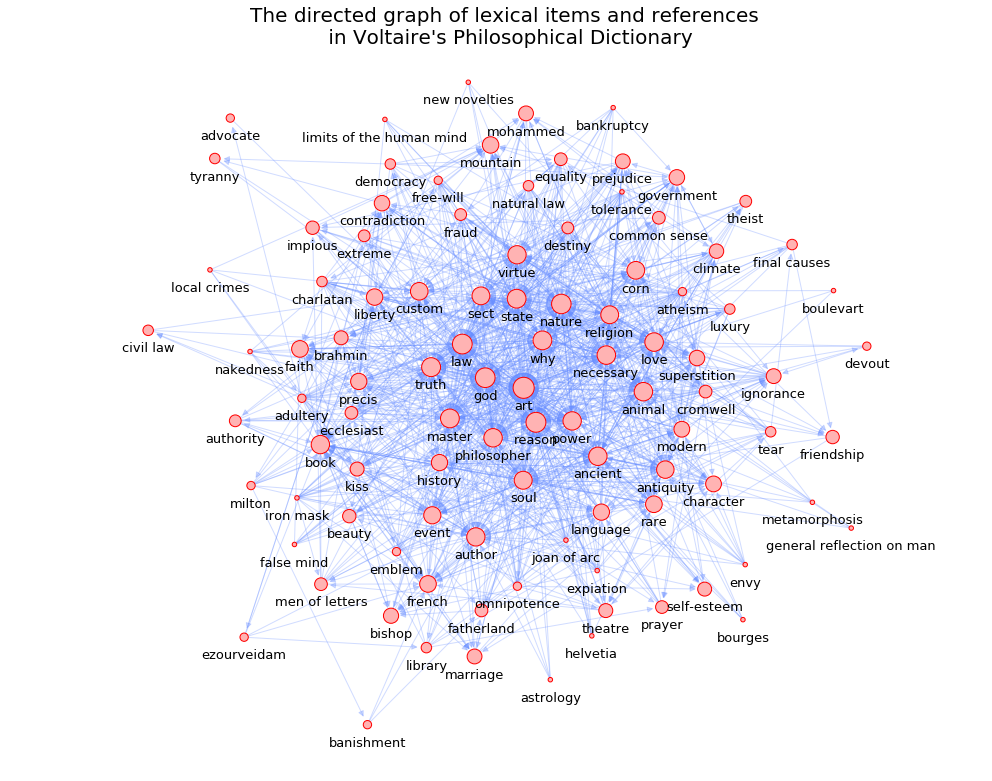

In [10]:
# nsi=[100*math.log(1+G.in_degree(n)) for n in G.nodes()]
nsi=[]
for n in G.nodes():
    if G.in_degree(n)>0:
        nsi.append(100*math.log(1+G.in_degree(n)))
    else:
        nsi.append(20)
figsize=(17,13)
pos=graphviz_layout(G) 

# print pos['superstition']
pos['mohammed']=(175, 248.08) #(166.47, 248.08)
pos['prejudice']=(209, 230.04) #(199.93, 230.04)
pos['government']=(228, 224)#(228.1, 216.81)
pos['fraud']=(152.04, 210)#(152.04, 213.88)
pos['impious']=(100, 205.04)#(108.26, 205.04)
pos['milton']=(78.373, 108)#(78.373, 103.7)
pos['fatherland']=(159.35, 61)#(159.35, 71.114)
pos['library']=(140, 47) #(149.52, 44.786)
pos['soul']=(174, 110) #(177.27, 119.58)
pos['language']=(201.47, 98) #(201.47, 92.316)
pos['expiation']=(200, 76) #(191.15, 73.547)
pos['antiquity']=(223.94, 114) #(223.94, 108.57)
pos['love']=(220, 162) #(212.16, 156.85)
pos['general reflection on man']=(289.26, 92) #(289.26, 108.09)
pos['ignorance']=(262, 149.18) #(256.55, 149.18)
pos['superstition']=(235.07, 156) #(235.07, 152.01)

# pos['common sense']=(234.27, 220) #(234.27, 212.84)
# pos['democracy']=(262.82, 200) #(262.82, 209.59)
# pos['charlatan']=(140, 194) #(128.71, 197.77)
# pos['ignorance']=(217.37, 90) #(217.37, 81.939)

node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,arrowsize=12, edge_color=edge_color,alpha=0.3)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -7 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=13);
sst="The directed graph of lexical items and references \n in %s" %st
plt.title(sst,fontsize=20);
plt.margins(x=0.1, y=0) 

#### The largest strongly connected component

In [11]:
Gl = max(nx.strongly_connected_components(G), key=len)
Glcc=G.subgraph(Gl)
print len(Glcc), len(Glcc.edges())

79 930


In [13]:
st="largest strongly connected component"
g_diagnostics(Glcc,st)

The largest strongly connected component graph has 79 nodes and 930 edges
The largest strongly connected component graph is a simple graph
The largest strongly connected component graph is an unweighted graph
The largest strongly connected component graph is a directed graph
The largest strongly connected component graph is not a bipartite graph
The largest strongly connected component graph is not a tree
The largest strongly connected component graph is a strongly connected graph
The largest strongly connected component graph is a weakly connected graph
The largest strongly connected component graph has no isolates
The density of the largest strongly connected component graph is 0.151
The transitivity of the largest strongly connected component graph is 0.324
The reciprocity of the largest strongly connected component graph is 0.178


#### Nodes outside the largest strongly connected component

In [15]:
for n in G.nodes():
    if n not in Glcc.nodes():
        print n
        print list(G.successors(n))
        print list(G.predecessors(n))
        print "&&&&&&&&&&&&&&&&&&&&&&"

astrology
[u'master', u'reason', u'law', u'art', u'author']
[]
&&&&&&&&&&&&&&&&&&&&&&
envy
[u'ancient', u'art', u'animal', u'author', u'modern', u'character', u'antiquity', u'atheism', u'reason', u'kiss', u'why']
[]
&&&&&&&&&&&&&&&&&&&&&&
false mind
[u'faith', u'art', u'animal', u'god', u'soul', u'reason', u'master', u'truth', u'why']
[]
&&&&&&&&&&&&&&&&&&&&&&
advocate
[u'law']
[u'adultery']
&&&&&&&&&&&&&&&&&&&&&&
nakedness
[u'art', u'god', u'why', u'mohammed', u'superstition', u'state', u'marriage', u'sect', u'kiss', u'event']
[]
&&&&&&&&&&&&&&&&&&&&&&
local crimes
[u'mountain', u'art', u'adultery', u'kiss', u'custom']
[]
&&&&&&&&&&&&&&&&&&&&&&
bourges
[u'reason', u'ancient', u'art', u'animal', u'antiquity']
[]
&&&&&&&&&&&&&&&&&&&&&&
expiation
[u'law', u'art', u'author', u'god', u'ignorance', u'antiquity', u'precis', u'religion', u'book', u'virtue', u'soul', u'love', u'custom', u'bishop', u'history']
[]
&&&&&&&&&&&&&&&&&&&&&&
tolerance
[u'ancient', u'art', u'power', u'government', u'g

In [16]:
g_diameter(Glcc,st)

The diameter of the largest strongly connected component of Voltaire's Philosophical Dictionary graph is 5


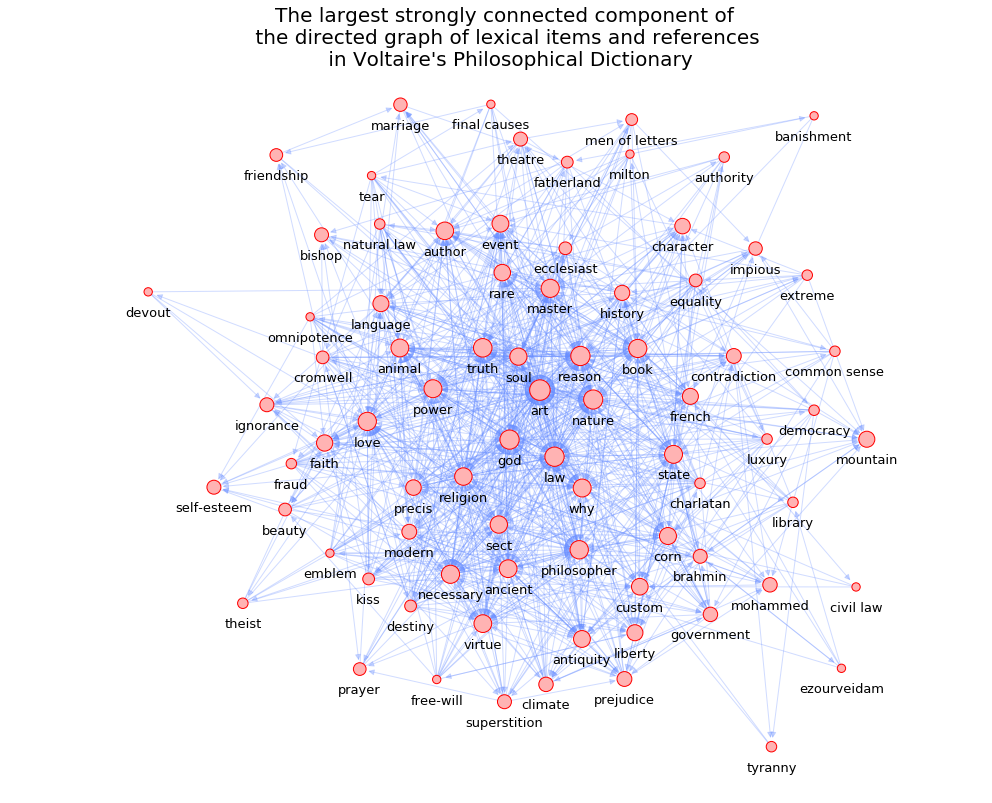

In [17]:
# nsi=[100*math.log(1+G.in_degree(n)) for n in G.nodes()]
nsi=[]
for n in Glcc.nodes():
    if Glcc.in_degree(n)>0:
        nsi.append(100*math.log(1+Glcc.in_degree(n)))
    else:
        nsi.append(20)
figsize=(17,13)
pos=graphviz_layout(Glcc) 

# print pos['fraud']
pos['fatherland']=(174.06, 208) #(174.06, 215.01)
pos['ecclesiast']=(173.44, 180) #(173.44, 175.47)
pos['event']=(152, 188) #(147.53, 180.86)
pos['luxury']=(240, 118) #(243.08, 128.08)
pos['contradiction']=(229.03, 145) #(229.03, 135.91)
pos['prejudice']=(192.93, 40) #(192.93, 46.164)
pos['language']=(112.56, 162) #(112.56, 157.89)
pos['reason']=(178.4, 145) #(178.4, 139.71)
pos['custom']=(198, 70) #(194.21, 65.938)
pos['philosopher']=(178, 82) #(168.4, 92.546)
pos['virtue']=(146.2, 58) #(146.2, 62.639)
pos['fraud']=(82.999, 110) #(82.999, 116.91)
# pos['charlatan']=(140, 194) #(128.71, 197.77)
# pos['ignorance']=(217.37, 90) #(217.37, 81.939)

node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Glcc, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Glcc, pos,arrowsize=12, edge_color=edge_color,alpha=0.3)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -7 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Glcc, yoffset,font_size=13);
sst="The largest strongly connected component of \n the directed graph of lexical items and references \n in %s" %st
plt.title(sst,fontsize=20);
plt.margins(x=0.1, y=0) 

### Directed paths between nodes of the largest strongly conneced component

In [18]:
node1="civil law"
node2="fraud"

try:
    ii = nx.dijkstra_path(G,node1,node2)
    nnd=[(ii[i],ii[i+1]) for i in range(len(ii)-1)]
except NetworkXNoPath,e:
    print e
    ii=[]
    nnd=[]
print "The directed path from '%s' to '%s' is:" %(node1,node2)
print ii
print "The distance between '%s' and '%s' in %i" %(node1,node2,len(ii)-1)
# nnd=[]
# nnd

The directed path from 'civil law' to 'fraud' is:
['civil law', u'precis', u'philosopher', u'character', u'tear', u'fraud']
The distance between 'civil law' and 'fraud' in 5


In [19]:
for node1 in Glcc.nodes():
    for node2 in Glcc.nodes():
        try:
            ii = nx.dijkstra_path(G,node1,node2)
            nnd=[(ii[i],ii[i+1]) for i in range(len(ii)-1)]
        except NetworkXNoPath,e:
            print e
            ii=[]
            nnd=[]
        if len(ii)-1==5:
            print "The directed path from '%s' to '%s' is:" %(node1,node2)
            print ii
            print "The distance between '%s' and '%s' in %i" %(node1,node2,len(ii)-1)
            print

The directed path from 'civil law' to 'fraud' is:
[u'civil law', u'precis', u'philosopher', u'character', u'tear', u'fraud']
The distance between 'civil law' and 'fraud' in 5

The directed path from 'civil law' to 'final causes' is:
[u'civil law', u'precis', u'philosopher', u'character', u'tear', u'final causes']
The distance between 'civil law' and 'final causes' in 5

The directed path from 'civil law' to 'banishment' is:
[u'civil law', u'law', u'government', u'brahmin', u'milton', u'banishment']
The distance between 'civil law' and 'banishment' in 5

The directed path from 'tear' to 'banishment' is:
[u'tear', u'nature', u'sect', u'brahmin', u'milton', u'banishment']
The distance between 'tear' and 'banishment' in 5

The directed path from 'mohammed' to 'fraud' is:
[u'mohammed', u'art', u'philosopher', u'character', u'tear', u'fraud']
The distance between 'mohammed' and 'fraud' in 5

The directed path from 'mohammed' to 'final causes' is:
[u'mohammed', u'art', u'philosopher', u'chara

The directed path from 'impious' to 'fraud' is:
[u'impious', u'mountain', u'philosopher', u'character', u'tear', u'fraud']
The distance between 'impious' and 'fraud' in 5

The directed path from 'impious' to 'final causes' is:
[u'impious', u'mountain', u'philosopher', u'character', u'tear', u'final causes']
The distance between 'impious' and 'final causes' in 5

The directed path from 'impious' to 'banishment' is:
[u'impious', u'nature', u'sect', u'brahmin', u'milton', u'banishment']
The distance between 'impious' and 'banishment' in 5

The directed path from 'theatre' to 'banishment' is:
[u'theatre', u'nature', u'sect', u'brahmin', u'milton', u'banishment']
The distance between 'theatre' and 'banishment' in 5

The directed path from 'final causes' to 'banishment' is:
[u'final causes', u'nature', u'sect', u'brahmin', u'milton', u'banishment']
The distance between 'final causes' and 'banishment' in 5

The directed path from 'banishment' to 'civil law' is:
[u'banishment', u'reason', u'co

In [ ]:
# Plot distances in graph

In [ ]:
# Find the two nodes with distance 5 (all pairs)

In [ ]:
# Add Communities and Centrality Indices